### 0 - Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### 1 - Read Data

In [2]:
data = pd.read_csv("icecream.csv")

### 2 - Data Preprocessing

In [3]:
def check_df(dataframe, target=None):
    print("############################")
    print("DATASET OVERVIEW")
    print("############################\n")

    # Basic Info
    print("##### Shape #####")
    print(dataframe.shape)
    
    print("\n##### Data Types #####")
    print(dataframe.dtypes)
    
    print("\n##### First 5 Rows #####")
    display(dataframe.head(5))
    
    print("\n##### Last 5 Rows #####")
    display(dataframe.tail(5))

    # Missing Values
    print("\n##### Missing Values #####")
    print(dataframe.isnull().sum()) 

check_df(data, target="Ice Cream Sales (units)")

############################
DATASET OVERVIEW
############################

##### Shape #####
(49, 2)

##### Data Types #####
Temperature (°C)           float64
Ice Cream Sales (units)    float64
dtype: object

##### First 5 Rows #####


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531



##### Last 5 Rows #####


,Temperature (°C),Ice Cream Sales (units)
44,3.610778,28.912188
45,3.704057,17.843957
46,4.130868,34.530743
47,4.133534,27.698383
48,4.899032,41.514822



##### Missing Values #####
Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64



############################
##### Boxplot of Temperature (°C) Distribution #####
############################


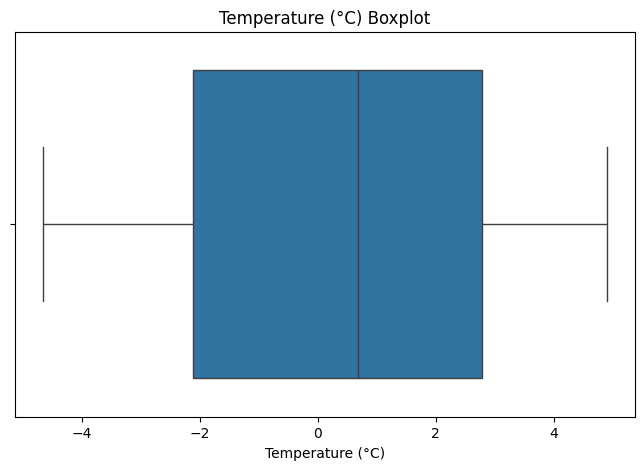


##### Correlation Matrix #####


,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000



##### Descriptive Statistics #####


,count,mean,std,min,25%,50%,75%,max
Temperature (°C),49.0,0.271755,2.697672,-4.662263,-2.111870,0.688781,2.784836,4.899032
Ice Cream Sales (units),49.0,15.905308,12.264682,0.328626,4.857988,12.615181,25.142082,41.842986



##### Correlation Matrix #####


,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


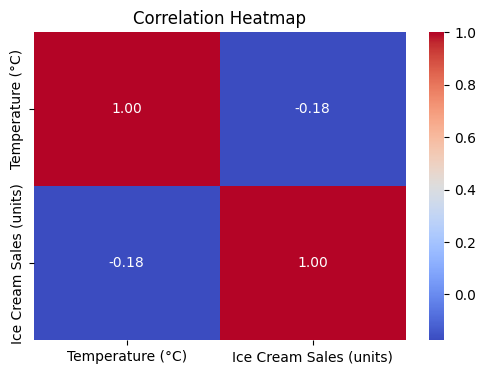


############################
Variable Distributions
############################


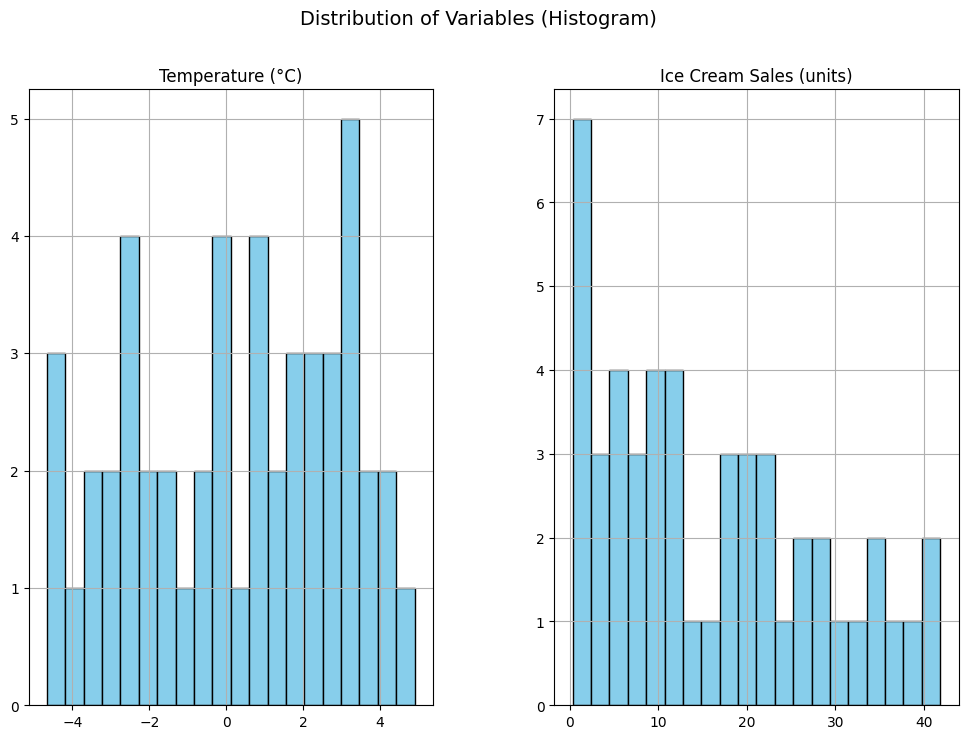


############################
Relationship between 'Temperature (°C)' and 'Ice Cream Sales (units)'
############################


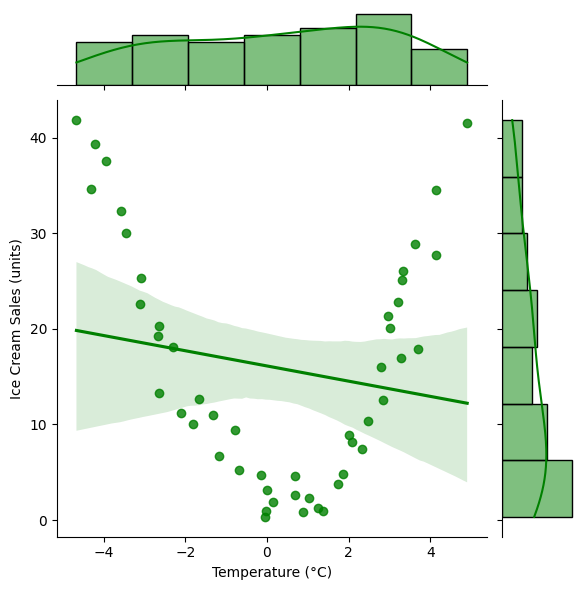

In [4]:
def check_df(dataframe, target=None):
    plt.figure(figsize=(8,5))
    sns.boxplot(data=dataframe, x='Temperature (°C)')
    plt.title("Temperature (°C) Boxplot")
    print("\n############################")
    print("##### Boxplot of Temperature (°C) Distribution #####")
    print("############################")
    plt.show()

    # Correlation
    print("\n##### Correlation Matrix #####")
    display(dataframe.corr())

    # Descriptive Stats
    print("\n##### Descriptive Statistics #####")
    display(dataframe.describe().T)

    # Correlation (only meaningful if there are two or more variables)
    if dataframe.shape[1] > 1:
        print("\n##### Correlation Matrix #####")
        display(dataframe.corr())
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    
    # Histograms
    print("\n############################")
    print("Variable Distributions")
    print("############################")
    dataframe.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle("Distribution of Variables (Histogram)", size=14)
    plt.show()

    # Scatter or Joint Plot (for single-variable relationships)
    if target and target in dataframe.columns:
        feature = [col for col in dataframe.columns if col != target][0]
        print("\n############################")
        print(f"Relationship between '{feature}' and '{target}'")
        print("############################")
        
        # Jointplot is very suitable (for single input-single output)
        sns.jointplot(x=feature, y=target, data=dataframe, kind='reg', color='green')
        plt.show()
    

check_df(data, target="Ice Cream Sales (units)")
    

In [5]:
# -------------------------------------------------------------
# 3 - CALCULATE METRICS
# -------------------------------------------------------------
def calculate_polynomial_metrics(dataframe, target, degrees=[1, 2, 3, 4, 5]):
    """
    Calculates R², MSE, and RMSE metrics for different polynomial degrees.
    
    Parameters:
    - dataframe: Input DataFrame containing features and target
    - target: Target column name
    - degrees: List of polynomial degrees to evaluate
    
    Returns:
    - X, y: Feature and target arrays
    - degrees: List of degrees used
    - y_pred_list: List of predicted values for each degree
    - r2_scores, mse_scores, rmse_scores: Metric lists
    """
    X = dataframe[['Temperature (°C)']].values
    y = dataframe[target]

    r2_scores = []
    mse_scores = []
    rmse_scores = []
    y_pred_list = []

    for d in degrees:
        model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
        model.fit(X, y)
        y_pred = model.predict(X)

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        r2_scores.append(r2)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        y_pred_list.append(y_pred)

    y_pred_df = pd.DataFrame({
        f'Degree {d}': y_pred_list[i] for i, d in enumerate(degrees)
    })

    print("\n##### y_pred Values (first 5 rows) #####")
    display(y_pred_df.head())

    return X, y, degrees, y_pred_list, r2_scores, mse_scores, rmse_scores



# -------------------------------------------------------------
# 4 - PLOT POLYNOMIAL CURVES FOR EACH DEGREE
# -------------------------------------------------------------
def plot_degree_curves(X, y, degrees, y_pred_list):
    """
    Plots scatter and polynomial fit curves for each degree side by side.
    """
    fig, axes = plt.subplots(1, len(degrees), figsize=(20, 4), sharey=True)

    # Get sorted X index once
    sort_idx = np.argsort(X.squeeze())
    X_sorted = X[sort_idx]

    for idx, d in enumerate(degrees):
        ax = axes[idx]
        ax.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

        # Sort predictions according to sorted X
        y_pred_sorted = y_pred_list[idx][sort_idx]

        ax.plot(X_sorted, y_pred_sorted, color='red', label=f'Degree {d}', linewidth=2)

        ax.set_title(f"Degree {d}")
        ax.set_xlabel('Temperature (°C)')
        if idx == 0:
            ax.set_ylabel('Ice Cream Sales (units)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()



# -------------------------------------------------------------
# 5- PLOT METRICS AND COMPARISON TABLE
# -------------------------------------------------------------
def plot_metrics_and_comparison(degrees, r2_scores, mse_scores, rmse_scores):
    """
    Displays a comparison table and plots R², MSE, and RMSE for each degree.
    """
    comparison_df = pd.DataFrame({
        'Degree': degrees,
        'R² Score': r2_scores,
        'MSE': mse_scores,
        'RMSE': rmse_scores
    })

    print("\n##### Degree Comparison Table #####")
    display(comparison_df)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # --- R² ---
    ax1.plot(degrees, r2_scores, marker='o')
    ax1.set_title('Polynomial Degree vs R² Score')
    ax1.set_xlabel('Degree')
    ax1.set_ylabel('R² Score')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # --- MSE ---
    ax2.plot(degrees, mse_scores, marker='o', color='orange')
    ax2.set_title('Polynomial Degree vs MSE')
    ax2.set_xlabel('Degree')
    ax2.set_ylabel('MSE')
    ax2.grid(True, linestyle='--', alpha=0.7)

    # --- RMSE ---
    ax3.plot(degrees, rmse_scores, marker='o', color='green')
    ax3.set_title('Polynomial Degree vs RMSE')
    ax3.set_xlabel('Degree')
    ax3.set_ylabel('RMSE')
    ax3.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



# -------------------------------------------------------------
# 6 - LINEAR vs POLYNOMIAL COMPARISON
# -------------------------------------------------------------
def plot_linear_vs_polynomial(X, y):
    """
    Compares Linear Regression and Polynomial Regression (degree 2) visually.
    """
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_linear_pred = linear_model.predict(X)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_model.fit(X, y)
    y_poly_pred = poly_model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5)

    X_sorted = np.sort(X, axis=0)
    plt.plot(X_sorted, y_linear_pred[np.argsort(X.squeeze())], color='red', label='Linear Regression')
    plt.plot(X_sorted, y_poly_pred[np.argsort(X.squeeze())], color='green', label='Polynomial Regression (Degree 2)')

    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Linear vs Polynomial Regression')
    plt.legend()
    plt.show()


# -------------------------------------------------------------
# 7 - MAIN FUNCTION (Run everything in sequence)
# -------------------------------------------------------------
def run_polynomial_analysis(dataframe, target="Ice Cream Sales (units)"):
    """
    Runs the full polynomial regression analysis, including:
    - Metric calculations
    - Degree-by-degree plots
    - Metric comparison plots
    - Linear vs Polynomial comparison
    """
    X, y, degrees, y_pred_list, r2_scores, mse_scores, rmse_scores = calculate_polynomial_metrics(dataframe, target)
    plot_degree_curves(X, y, degrees, y_pred_list)
    plot_metrics_and_comparison(degrees, r2_scores, mse_scores, rmse_scores)
    plot_linear_vs_polynomial(X, y)

    return X, y, degrees, y_pred_list, r2_scores, mse_scores, rmse_scores


### 8 - OUTPUTS

In [6]:
# Only calculate metrics
X, y, degrees, y_pred_list, r2_scores, mse_scores, rmse_scores = calculate_polynomial_metrics(
    data,
    "Ice Cream Sales (units)"
)


##### y_pred Values (first 5 rows) #####


,Degree 1,Degree 2,Degree 3,Degree 4,Degree 5
0,19.835042,46.564507,44.409968,41.710774,42.936150
1,19.559704,40.600548,39.310534,38.331380,38.391372
2,19.478008,38.915089,37.850163,37.268698,37.104734
3,19.267485,34.749272,34.201640,34.436510,33.898539
4,18.971914,29.331940,29.366994,30.309973,29.623666


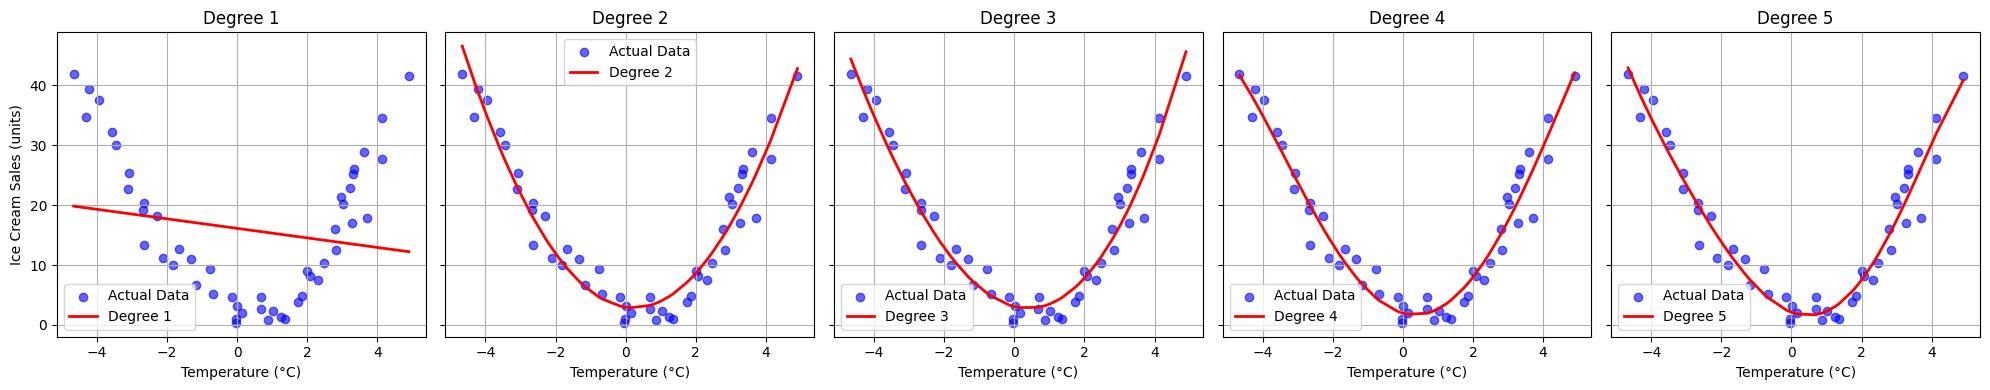

In [7]:
# Only plot degree-wise curves
plot_degree_curves(X, y, degrees, y_pred_list)


##### Degree Comparison Table #####


,Degree,R² Score,MSE,RMSE
0,1,0.030690,142.830404,11.951167
1,2,0.932114,10.003221,3.162787
2,3,0.936701,9.327243,3.054054
3,4,0.943845,8.274534,2.876549
4,5,0.945283,8.062653,2.839481


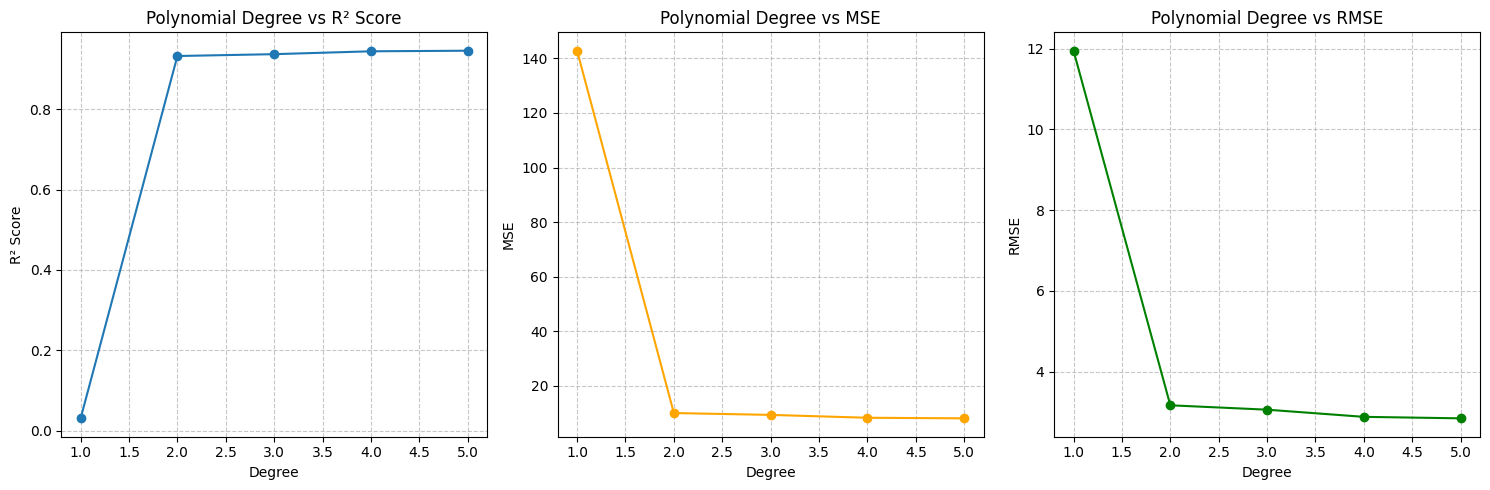

In [8]:
# Only plot metric comparisons
plot_metrics_and_comparison(degrees, r2_scores, mse_scores, rmse_scores)

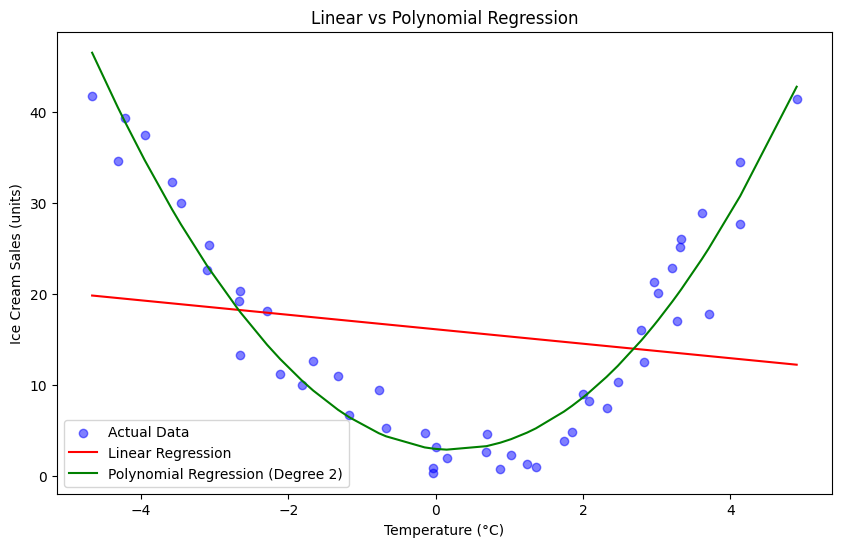

In [9]:
# Only plot linear vs polynomial comparison
plot_linear_vs_polynomial(X, y)

In [10]:
# Run the full analysis (everything together)
# run_polynomial_analysis(data, "Ice Cream Sales (units)")